# ```pirel``` Tutorial : ```sweeps```
Another package of ```pirel``` is ```pirel.sweeps```, which is used to create arrays and matrices of ```LayoutPart``` instances.

Let's first create a ```pirel``` object

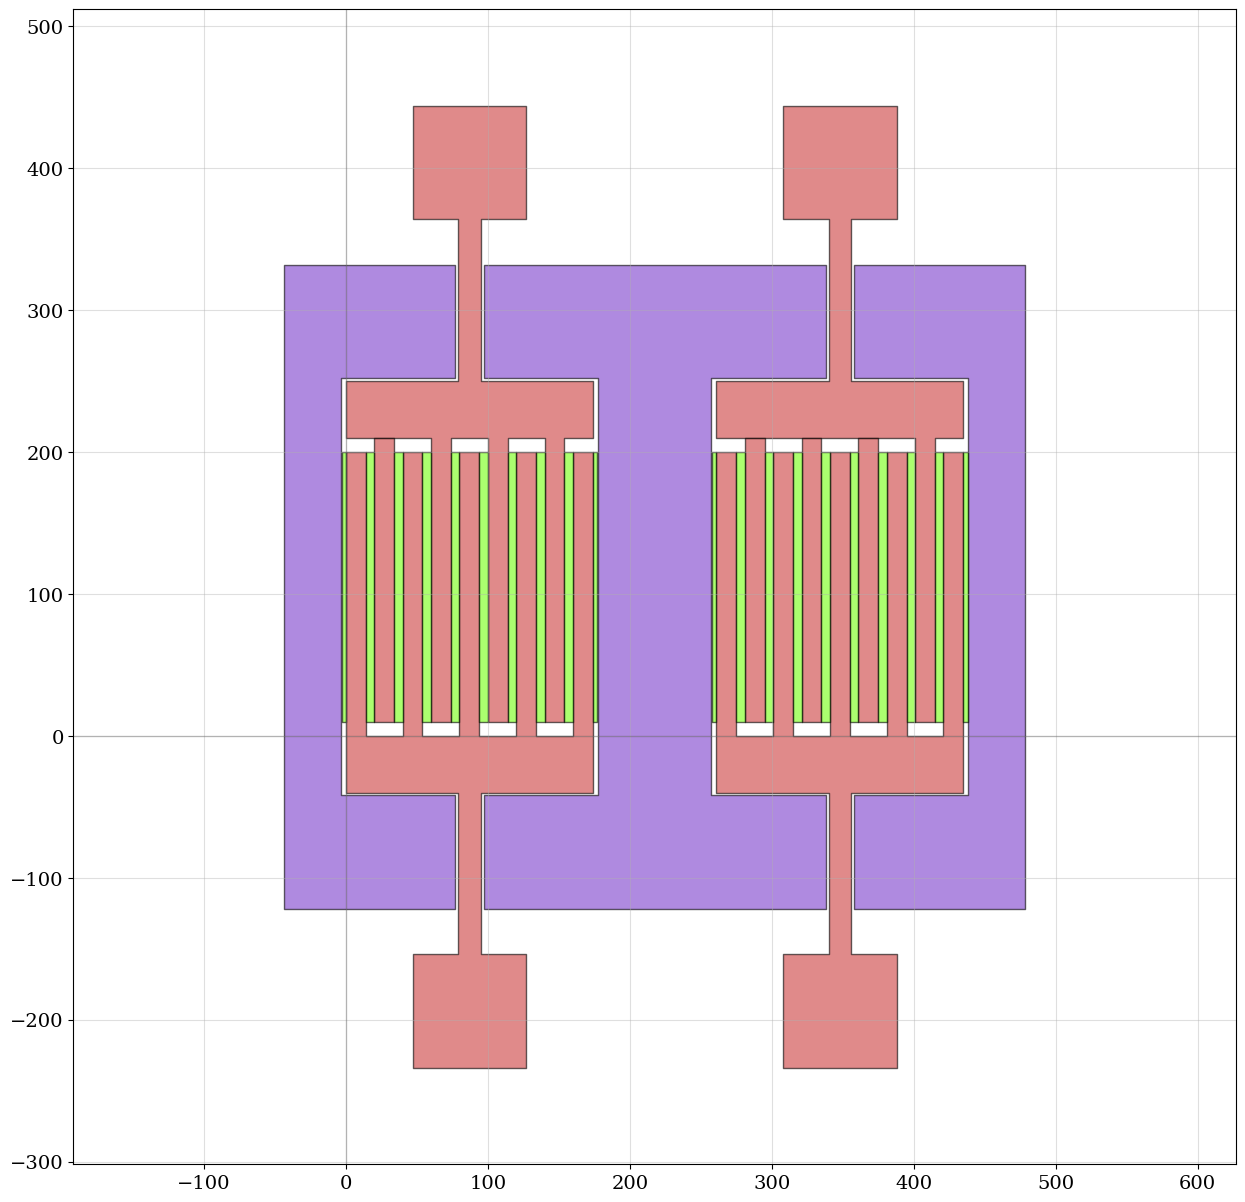

In [12]:
import pirel.pcells as pc
import pirel.modifiers as pm
import pirel.tools as pt
import pirel.sketch_tools as pst

dut=pm.addPad(pm.makeArray(pm.addPartialEtch(pc.LFERes),n=2),side=('top','bottom'))(name='SweptDevice')

pst.check(dut.draw(),joined=True)

To create a parametric array of ```dut``` ,let's define a ```SweepParam``` from the package ```pirel.sweeps```

In [13]:
import pirel.sweeps as ps

x_param=ps.SweepParam({'IDTCoverage':[0.3,0.5,0.7],'IDTPitch':[10,12,14]})

In ```x_param```, we are sweeping two parameters at the same time : ```x_param``` is a sweep of length 3 , but each element has two parameters changing...

In other words...


In [14]:
len(x_param)

3

In [15]:
print(x_param[0])
print(x_param[1])
print(x_param[2])

{'IDTCoverage': 0.3, 'IDTPitch': 10}
{'IDTCoverage': 0.5, 'IDTPitch': 12}
{'IDTCoverage': 0.7, 'IDTPitch': 14}


To build an array, we initialize a ```PArray```, which is a ```LayoutPart``` in turn and so has access to all functionalities described for ```pcells``` and ```modifiers```.

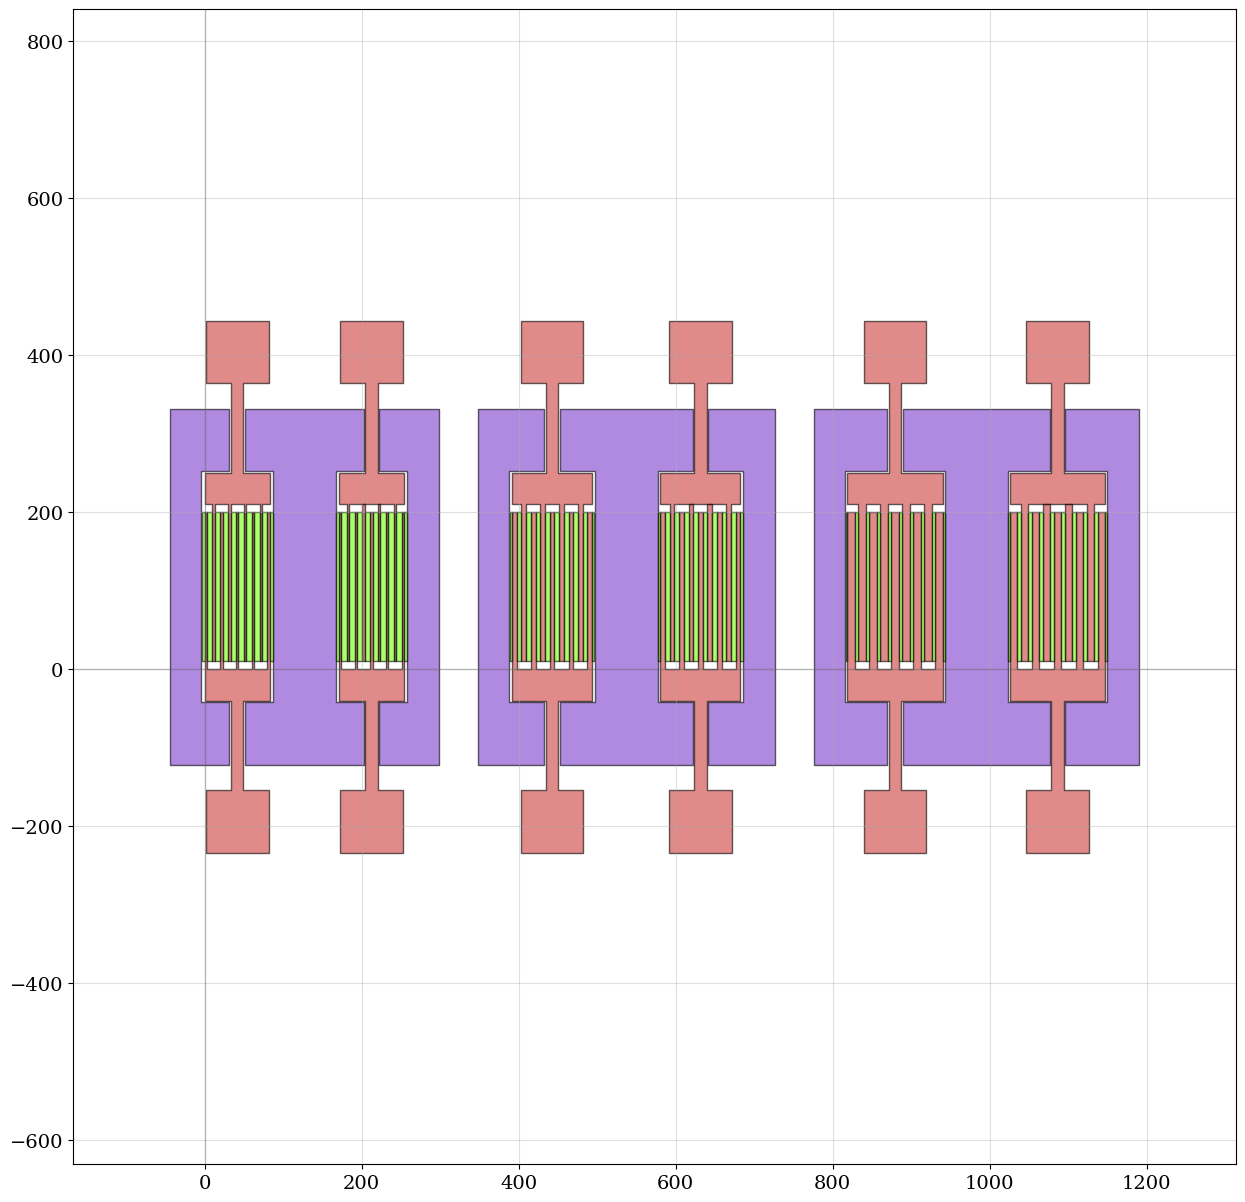

In [16]:
dut_array=ps.PArray(dut,x_param)
pst.check(dut_array.draw(),joined=True)

By default, this cell prints some labels on top and bottom of each sweep point.
You can remove this behavior by setting 

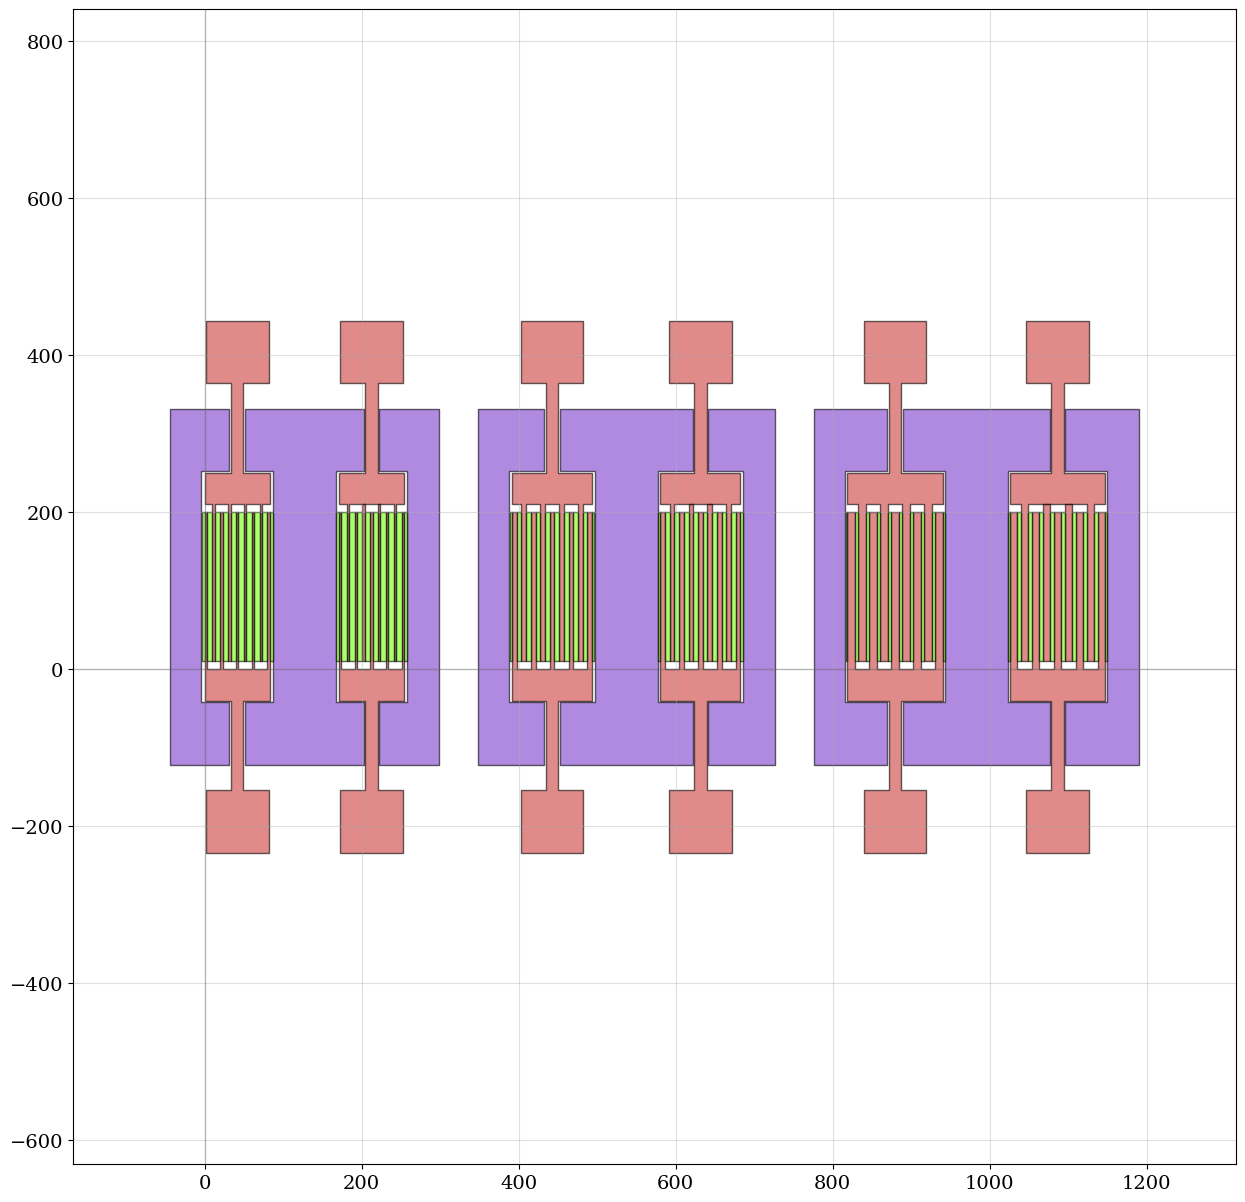

In [18]:
dut_array.labels_top=None
dut_array.labels_bottom=None
pst.check(dut_array.draw(),joined=True)

The next natural extension is to create ```PMatrix```.

We will need another parameter to sweep over the Y axis (```y_param```).


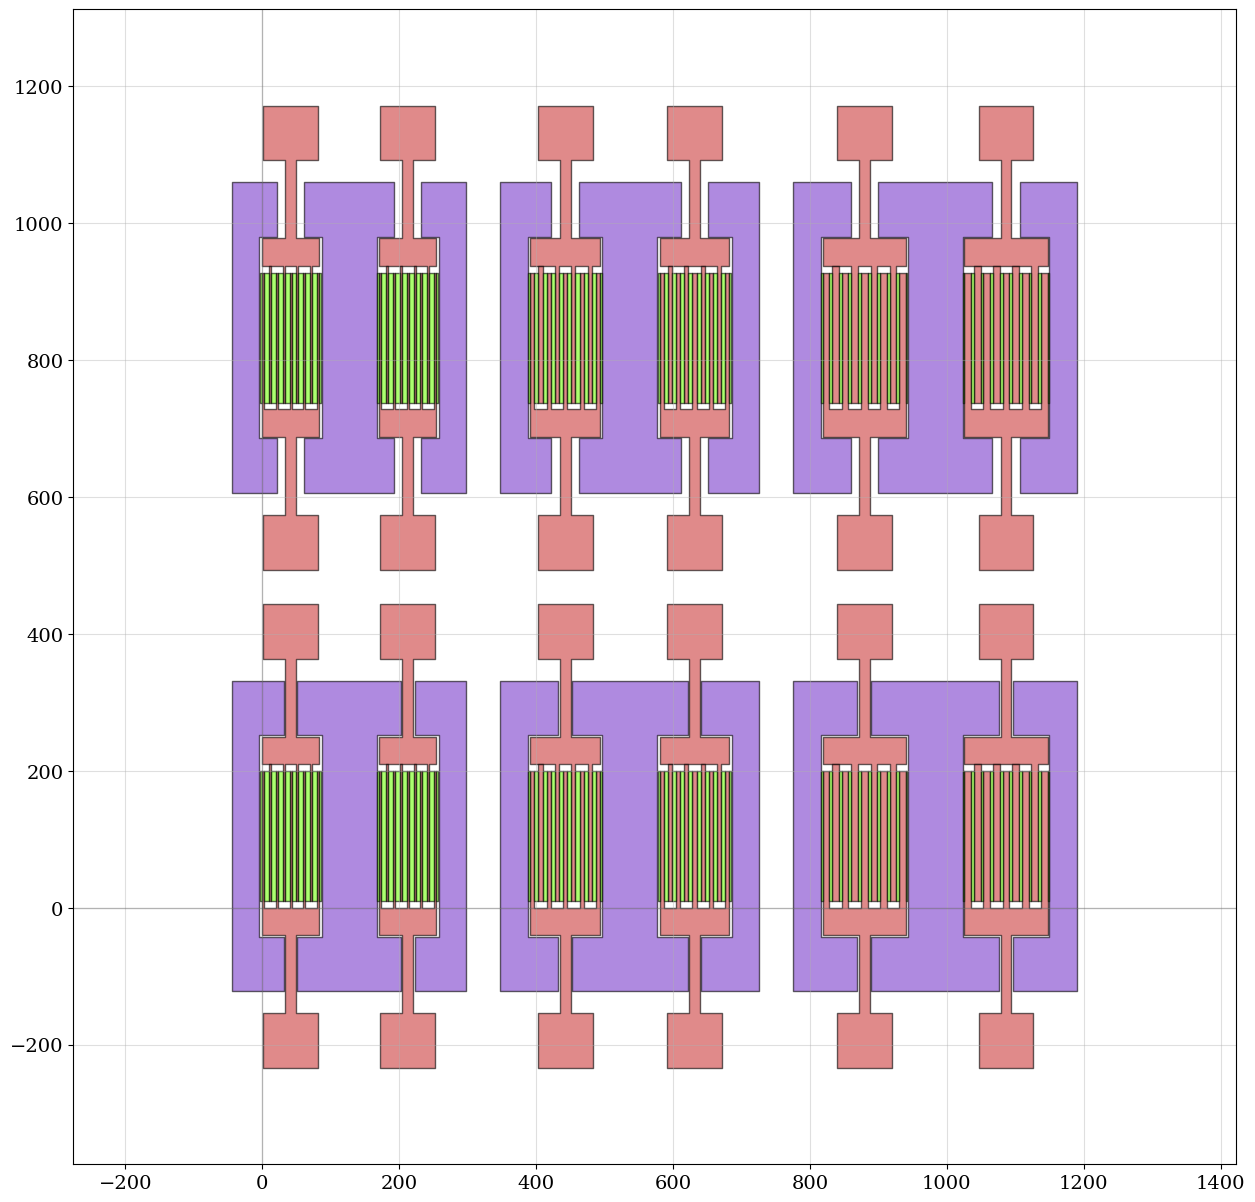

In [19]:
y_param=ps.SweepParam({'AnchorSizeX':[20,40]})

dut_matrix=ps.PMatrix(dut,x_param,y_param)

dut_matrix.view()
